## Data Description:
The data consist of 77 breakfast cereals (each row represents a cereal) and 16 variables contained cereal names, manufacturers (7 different makers), type (2 cereal types), rating, 9 variables on nutrition information such as potassium, fibre, protein, etc., and other specifications.



## Objectives
- Manipulate data using Python programming.

- Explore shape of the data,relationships,and trends.

- Create data visualization. 

#### Preparing data

We will import the required libraries and read the data set.

- Pandas - Data manipulation
- Numpy - Data arrays
- Matplotlib & Seaborn - Data visualisation


In [1]:
# Import libraries and alias for easy reading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the data

- dataset exploration--getting a feel for the data set.



In [2]:
df = pd.read_csv(r"C:\Downloads\cereal.csv")

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [5]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [6]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

## Exploratory data analysis


In [7]:
# count unique values 

df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [9]:
# Check duplicate data

df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Length: 77, dtype: bool

In [10]:
#Let us find out - How many 'H' type of cereals 

df['name'][df['type']=='H'].count()


3

In [11]:
#Let us find out - How many 'C' type of cereals

df['name'][df['type']=='C'].count()

74

 Out of 77, 74 are of type Cold and only 3 are of type Hot

In [12]:
# How many 'shelf' cereals are placed on

df['shelf'].unique().size

3

In [13]:
# Count of possible null/missing values

df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

We observed no null values

The Gods have blessed us with the perfect dataset 

In [14]:
#rename some columns names 

df.rename(columns={'mfr': 'Manufacturer'},inplace = True)
df.head(2)

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


##### perform basic statistics to explore the data

In [15]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [16]:
# as we can see sugar have negative value
# we will remove it

removeIndex = list(df.loc[df["sugars"]<1].index)

removeIndex


[3, 20, 54, 55, 57, 63, 64, 65]

In [17]:
df.drop(removeIndex,inplace = True)


##### Top 5 rating

In [18]:
df.nlargest(5, 'rating')

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.0,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.0,1.00,59.363993
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.0,0.80,58.345141


### Now lets start graphing this data and visualizing relationships between each feature.

- Exploring with Visuals

<AxesSubplot:xlabel='Manufacturer', ylabel='rating'>

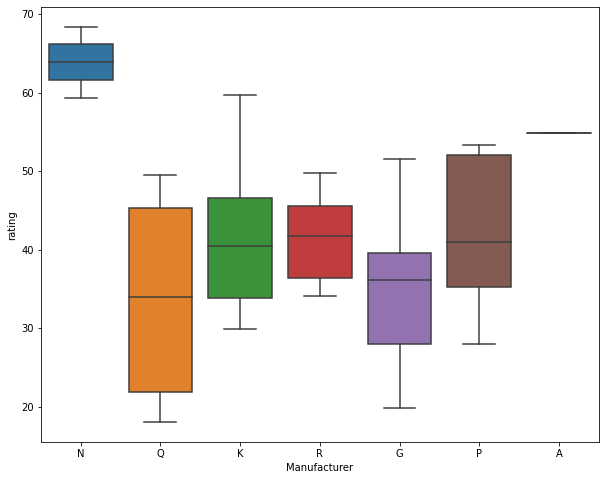

In [19]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df,x = 'Manufacturer' , y= 'rating')

In [20]:
#'N' has the highest number of rating
# lets find out  what are the 5 Nabisco cereals that have high ratings

df.loc[df['Manufacturer'] == 'N']

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.0,1.00,59.363993


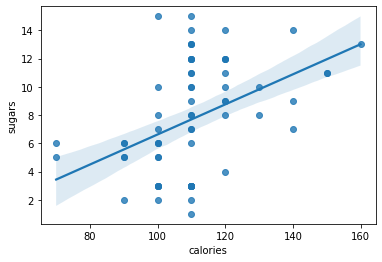

In [21]:

# lets see how the amount of sugar in the cereal relates to the number of calories

ax = sns.regplot(x="calories", y="sugars", data=df)


We can see as predicted that as the amount of sugar increases then the number of calories increases as well

##### Finding the highest and lowest rated manufacturers

<Figure size 432x288 with 0 Axes>

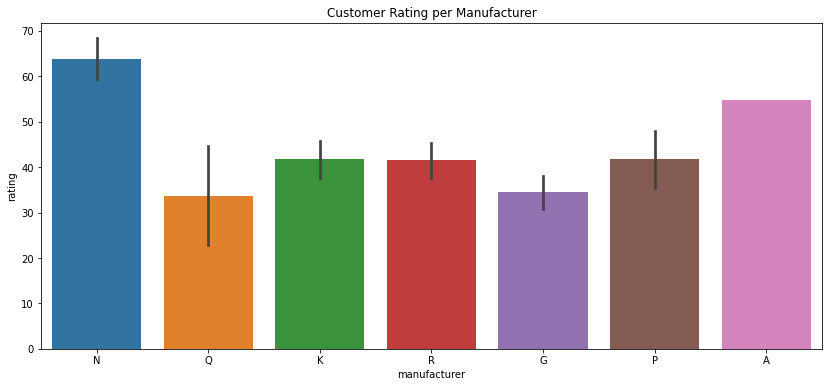

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(14,6))
plt.title('Customer Rating per Manufacturer')
sns.barplot(x=df['Manufacturer'], y=df['rating'])
plt.xlabel('manufacturer')
plt.figure()


Text(0.5, 1.0, 'Sugars Amount vs Rating')

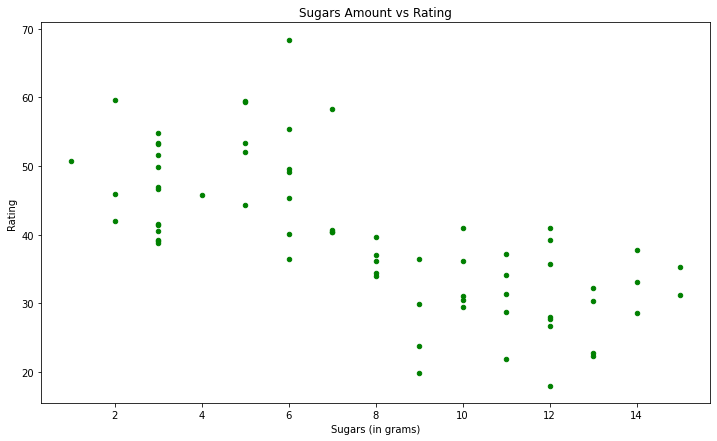

In [25]:
#plot a scatterplot of sugars and ratings variables

df.plot.scatter(x='sugars',y='rating',c='green', figsize=(12,7))
plt.xlabel("Sugars (in grams)")
plt.ylabel("Rating")
plt.title('Sugars Amount vs Rating')

- The scatterplot confirms the strong negative correlation between the amount of sugars in the cereals and the ratings

- most of the sugar in cereal varies from mfr(2-5)


array([[<AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'protein'}>,
        <AxesSubplot:title={'center':'fat'}>,
        <AxesSubplot:title={'center':'sodium'}>],
       [<AxesSubplot:title={'center':'fiber'}>,
        <AxesSubplot:title={'center':'carbo'}>,
        <AxesSubplot:title={'center':'sugars'}>,
        <AxesSubplot:title={'center':'potass'}>],
       [<AxesSubplot:title={'center':'vitamins'}>,
        <AxesSubplot:title={'center':'shelf'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'cups'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

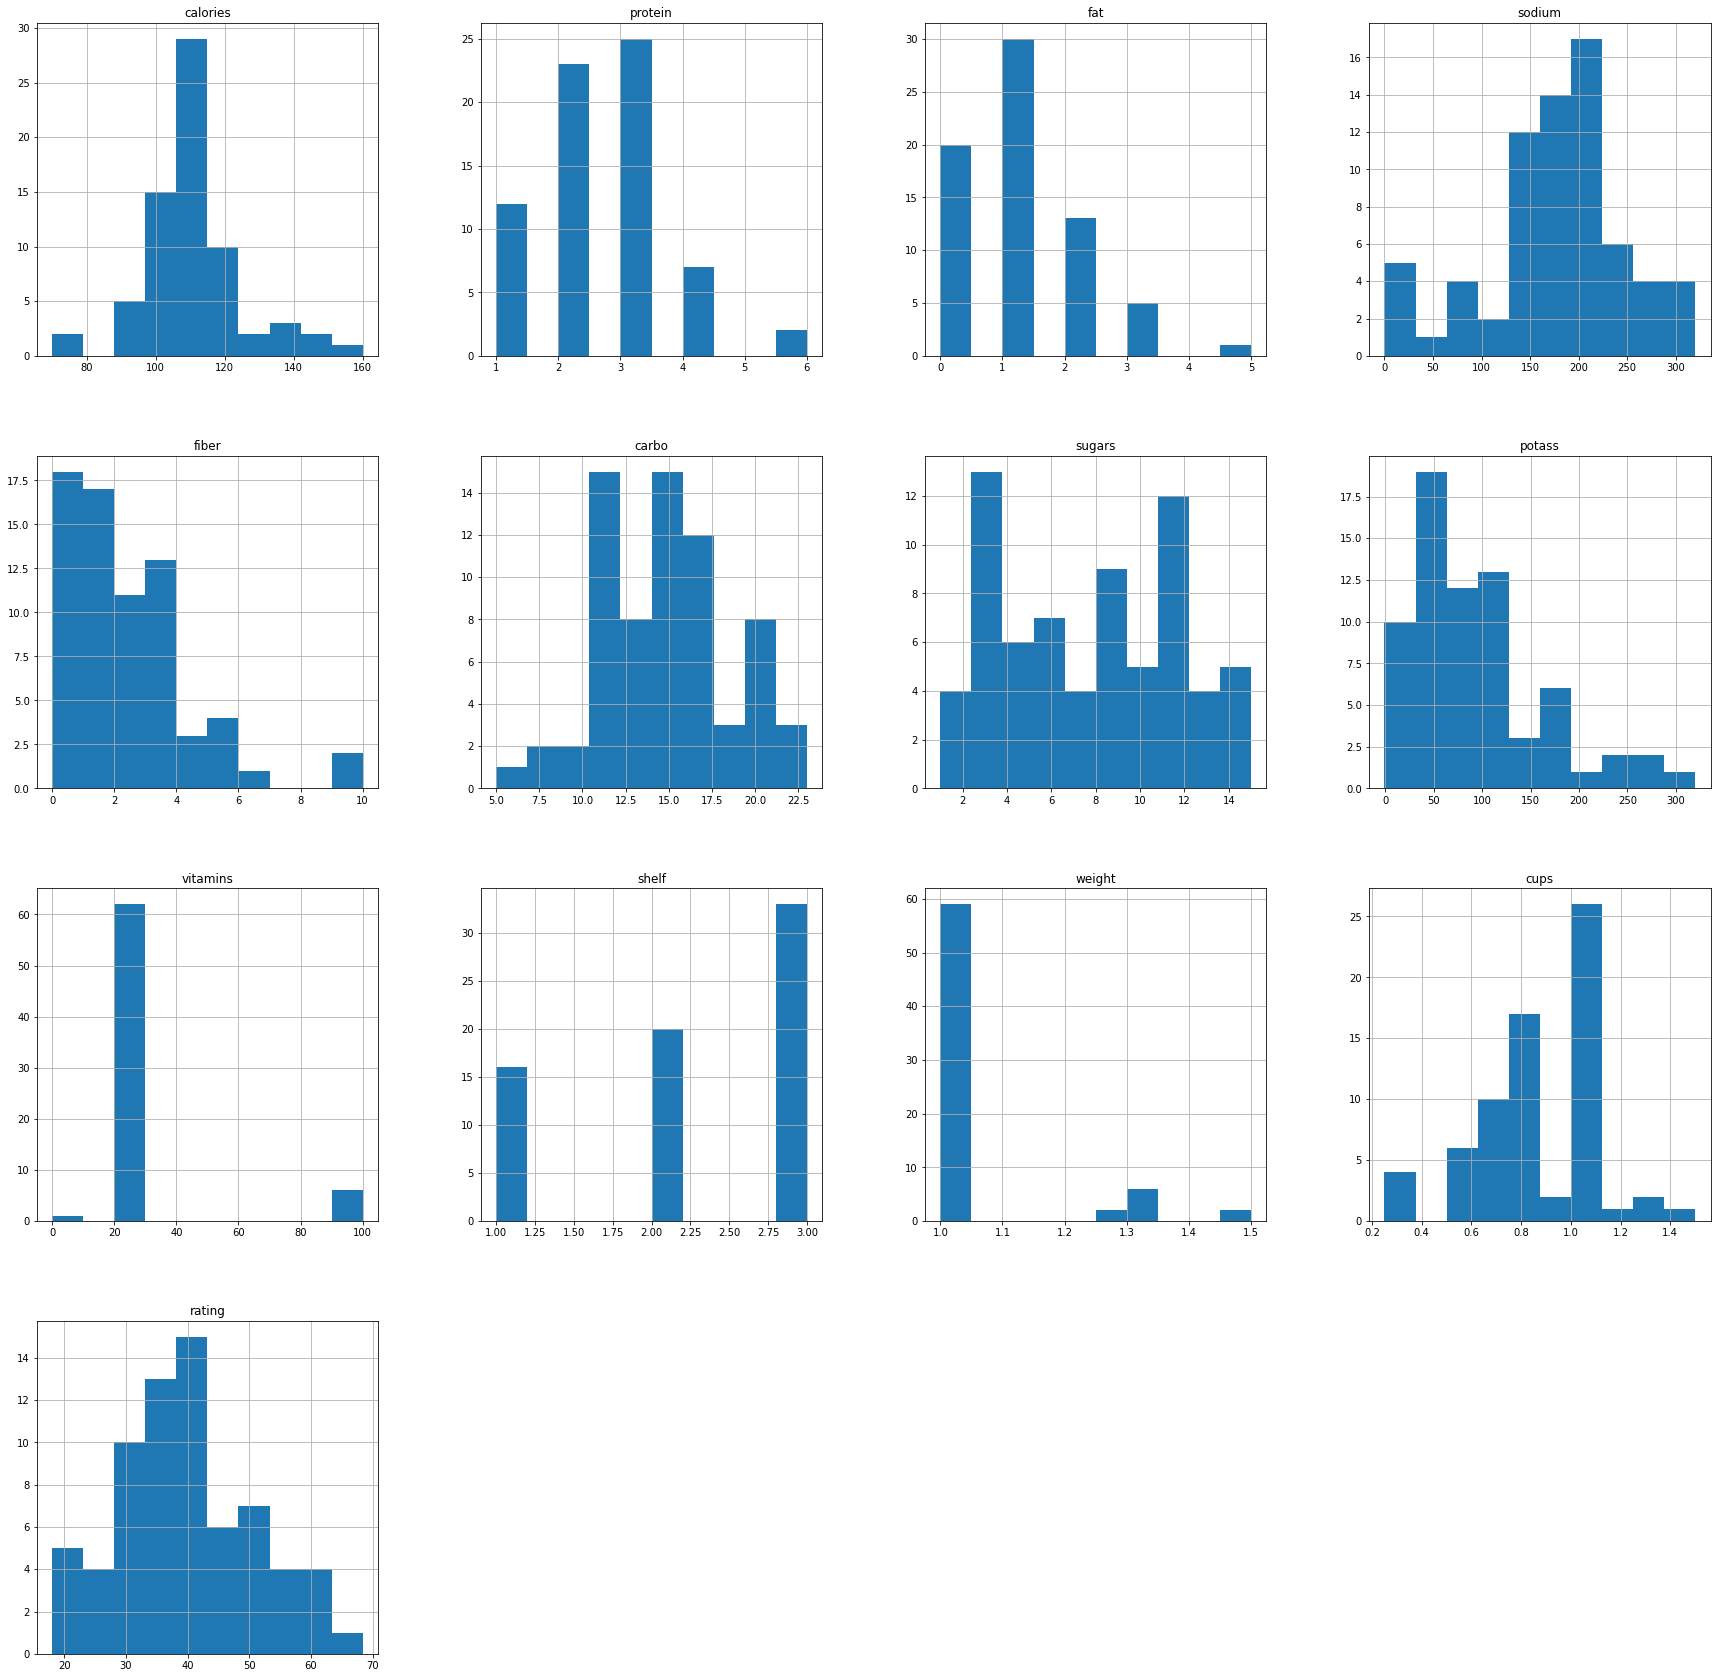

In [27]:
#Let's plot all the histogram from this dataset

df.hist(figsize=(30,30))

##### Key findings on the components of the cereals:
- Most of the cereals have between 80 and 125 calories per serving;
- The majority of the cereals have high sodium values - over 150 milligrams;
- Fiber amounts are quite low in most of the cereals (0-4 grams);
- Sugar values are quite spread out among the cereals;
- Most of cereals have up to 130 milligrams of potassium;
- The ratings for the cereals range mostly from 25 to 55 scores.

In [19]:
# lets find out the rating using groupby 
# Our main variable of interest in this dataset is cereal rating. We will take a deeper dive looking at the distribution 


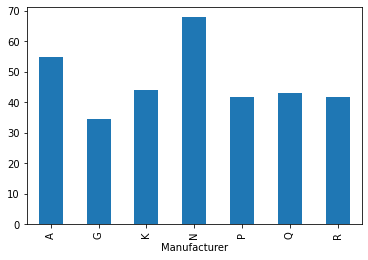

In [20]:
df.groupby('Manufacturer')['rating'].mean().plot.bar()
plt.show()

Manufacturer's G and K are the most prevalent manufacturers while A and N have the highest average rating's amongst our dataset. Manufacturer G has the 2nd highest number of cereals, but the lowest average rating. Manufacturer N has the highest average rating and the lowest calories on average across their brands of cereal.